<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/StepikData2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sub_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
sub_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [ ]:
sub_data['date'] = pd.to_datetime(sub_data['timestamp'], unit='s')
sub_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [ ]:
sub_data['day'] = sub_data['date'].dt.date
sub_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
pvt_data = sub_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()
pvt_data.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
events = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [ ]:
events['date'] = pd.to_datetime(events['timestamp'], unit='s')
events['day'] = events['date'].dt.date

In [ ]:
# user id and days he was online
events[['user_id', 'day', 'date']].drop_duplicates(subset=['user_id', 'day'])\
  .groupby('user_id')['date'].apply(list).head()

user_id
1                                [2016-09-02 14:44:24]
2           [2017-12-27 14:02:44, 2018-02-21 15:29:26]
3    [2015-06-15 08:54:36, 2015-09-03 05:22:05, 201...
5           [2016-06-17 09:46:49, 2017-07-12 11:40:21]
7                                [2018-03-21 12:17:40]
Name: date, dtype: object

In [ ]:
# gap_duration betwen online
gap = events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
  .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

gap

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [ ]:
# diff in days
gap = pd.Series(np.concatenate(gap, axis=0))
gap = gap / (24 * 60 * 60)

<Axes: >

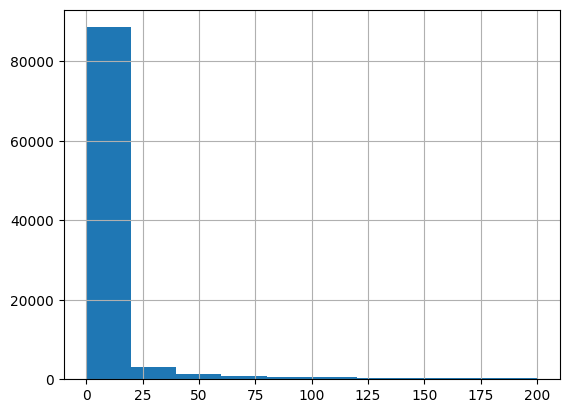

In [ ]:
gap[gap < 200].hist()

In [ ]:
gap.quantile(0.99)

294.63582037037014

In [ ]:
sub_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [ ]:
sub_data[sub_data['submission_status']== 'correct'].groupby('user_id')\
  .agg({'submission_status': 'count'})\
  .sort_values('submission_status', ascending=False)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
...,...
6191,1
6184,1
6166,1
